**Introduction**

This notebook contains an analysis of the road pavement dataset for the city engineering office. The goal is to identify which road segments require urgent maintenance by exploring key features and their relationships with the Needs_Maintenance target variable. We will perform five distinct observations using various data analysis techniques.

**Setup and Data Loading**

First, we'll load the necessary libraries and the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

# Load the dataset
try:
    df = pd.read_csv('/content/ESC 12 Pavement Dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'ESC 12 Pavement Dataset.csv' was not found.")
    exit()


print("\nFirst 5 rows of the dataset:")
print(df.head())


print("\nDataFrame information:")
df.info()

Dataset loaded successfully.

First 5 rows of the dataset:
   Segment ID    PCI  Road Type  AADT Asphalt Type  Last Maintenance  \
0  SID 155440  70.00  Secondary  4634     Concrete              2022   
1  SID 244365  37.87   Tertiary  3474      Asphalt              2017   
2  SID 137867  88.32   Tertiary  1734     Concrete              2019   
3  SID 540519  52.30   Tertiary  3119      Asphalt              2008   
4  SID 745776  49.10   Tertiary  3505      Asphalt              2019   

   Average Rainfall  Rutting   IRI  Needs Maintenance  
0             42.07    15.11  0.68                  0  
1             79.60    19.67  0.99                  1  
2             62.69    14.73  0.50                  0  
3             79.32    17.01  1.04                  1  
4             71.81    21.08  1.18                  1  

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 10 columns):
 #   Column             Non-Null Co

**Observation 1: Distribution of Pavement Condition Index (PCI)**

The distribution of the Pavement Condition Index (PCI) is a key indicator of the overall health of the road network. A histogram with a Kernel Density Estimate (KDE) provides a clear visual representation.


### Observation 1: Distribution of Pavement Condition Index (PCI)
PCI distribution plot saved as pci_distribution.png
Skewness of PCI: -0.0634


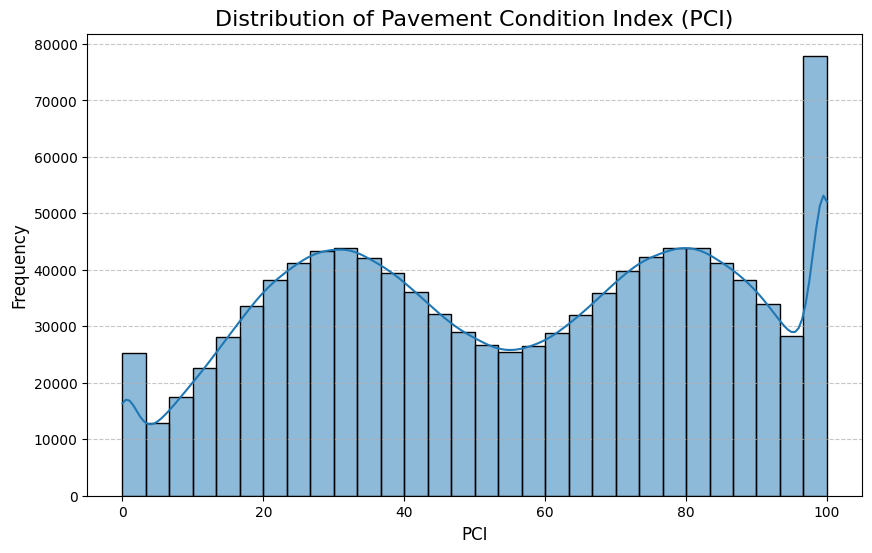

In [ ]:
print("\n### Observation 1: Distribution of Pavement Condition Index (PCI)")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PCI', kde=True, bins=30)
plt.title('Distribution of Pavement Condition Index (PCI)', fontsize=16)
plt.xlabel('PCI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('pci_distribution.png')
print("PCI distribution plot saved as pci_distribution.png")

pci_skewness = df['PCI'].skew()
print(f"Skewness of PCI: {pci_skewness:.4f}")

**Interpretation:** The distribution of PCI values is relatively uniform but shows a slight left skew. This indicates that there's a higher frequency of road segments with a higher PCI (better condition), which is a positive sign for the road network's overall health. However, there is still a significant number of segments with lower PCI values, which suggests a need for maintenance.

**Observation 2: Mean AADT by Road Type**

Understanding the traffic volume on different road types is essential for prioritizing maintenance. This analysis compares the Mean Annual Average Daily Traffic (AADT) across Primary, Secondary, and Tertiary roads.


### Observation 2: Mean AADT by Road Type
Mean AADT by Road Type:
Road Type
Primary      30770.318015
Secondary    11775.417291
Tertiary      2465.765446
Name: AADT, dtype: float64
Mean AADT by Road Type plot saved as mean_aadt_by_road_type.png


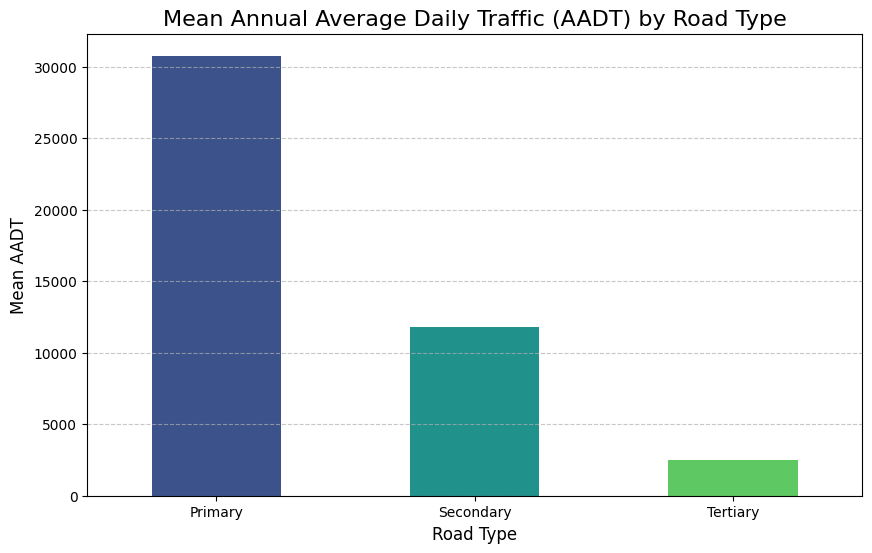

In [ ]:
print("\n### Observation 2: Mean AADT by Road Type")
mean_aadt_by_road_type = df.groupby('Road Type')['AADT'].mean().sort_values(ascending=False)
print("Mean AADT by Road Type:")
print(mean_aadt_by_road_type)
plt.figure(figsize=(10, 6))
mean_aadt_by_road_type.plot(kind='bar', color=sns.color_palette("viridis", 3))
plt.title('Mean Annual Average Daily Traffic (AADT) by Road Type', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Mean AADT', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('mean_aadt_by_road_type.png')
print("Mean AADT by Road Type plot saved as mean_aadt_by_road_type.png")

**Interpretation:** As expected, Primary roads have the highest average daily traffic, followed by Secondary and Tertiary roads. This is a crucial finding for maintenance planning, as higher traffic volume on a road segment can accelerate its deterioration, making it a priority for maintenance.

**Observation 3: Relationship between Rutting and IRI**

Rutting and the International Roughness Index (IRI) are two critical pavement distress indicators. A scatter plot can visualize their relationship, and the Pearson correlation coefficient quantifies it.


### Observation 3: Relationship between Rutting and IRI
Rutting vs. IRI scatter plot saved as rutting_vs_iri.png
Pearson correlation between Rutting and IRI: 0.4924


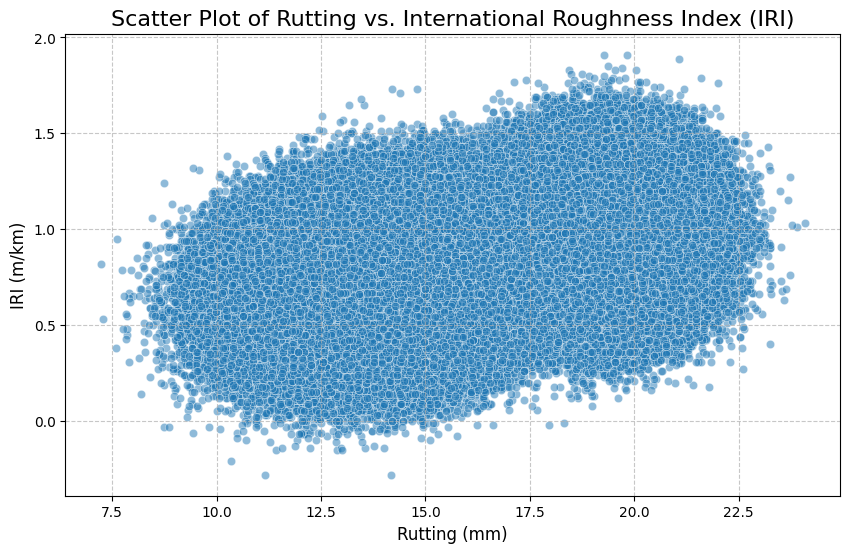

In [ ]:
print("\n### Observation 3: Relationship between Rutting and IRI")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rutting', y='IRI', alpha=0.5)
plt.title('Scatter Plot of Rutting vs. International Roughness Index (IRI)', fontsize=16)
plt.xlabel('Rutting (mm)', fontsize=12)
plt.ylabel('IRI (m/km)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('rutting_vs_iri.png')
print("Rutting vs. IRI scatter plot saved as rutting_vs_iri.png")

# Calculate Pearson correlation
correlation = df['Rutting'].corr(df['IRI'])
print(f"Pearson correlation between Rutting and IRI: {correlation:.4f}")

**Interpretation:** There is a moderate positive correlation (r=0.4924) between Rutting and IRI. This suggests that as the depth of rutting increases, the roughness of the road surface also tends to increase. Both are important factors in determining pavement condition, and their relationship indicates that they often worsen together.

**Observation 4: Proportion of Segments Needing Maintenance by Road Type**

This observation calculates the proportion of road segments that require maintenance within each road type. It helps to identify which type of road is most in need of attention.


### Observation 4: Proportion of Segments Needing Maintenance by Road Type
Proportion of segments needing maintenance by Road Type:
Road Type
Tertiary     0.586254
Secondary    0.483865
Primary      0.337667
Name: Needs Maintenance, dtype: float64
Maintenance proportion by Road Type plot saved as maintenance_proportion_by_road_type.png


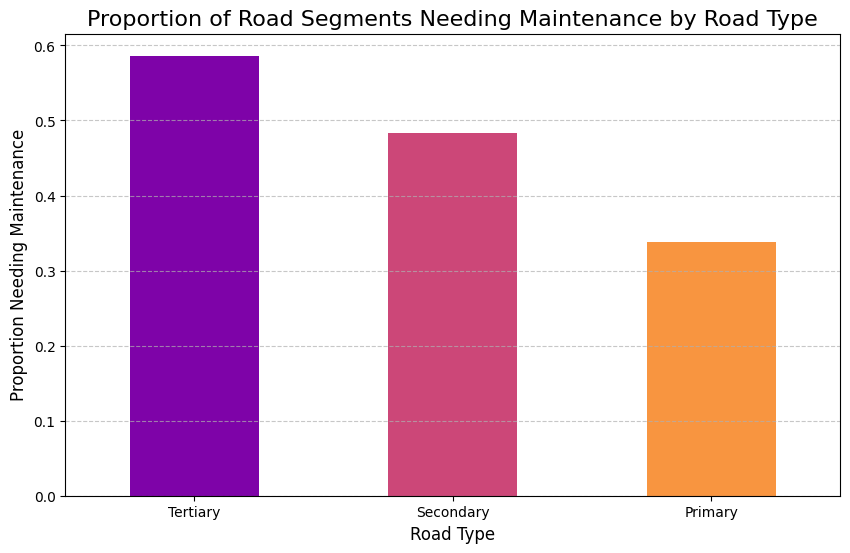

In [ ]:
print("\n### Observation 4: Proportion of Segments Needing Maintenance by Road Type")
maintenance_proportions = df.groupby('Road Type')['Needs Maintenance'].mean().sort_values(ascending=False)
print("Proportion of segments needing maintenance by Road Type:")
print(maintenance_proportions)
plt.figure(figsize=(10, 6))
maintenance_proportions.plot(kind='bar', color=sns.color_palette("plasma", 3))
plt.title('Proportion of Road Segments Needing Maintenance by Road Type', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Proportion Needing Maintenance', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('maintenance_proportion_by_road_type.png')
print("Maintenance proportion by Road Type plot saved as maintenance_proportion_by_road_type.png")

**Interpretation:** Tertiary roads have the highest proportion of segments needing maintenance, with 58.63% of them requiring attention. Secondary roads follow with 48.39%, and Primary roads have the lowest proportion at 33.77%. This finding suggests that tertiary roads, despite having lower traffic volume, are in the most critical condition and should be a priority for maintenance efforts.

**Observation 5: PCI vs. Maintenance Age**

Creating a new feature, Maintenance Age, by calculating the years since the last maintenance allows us to see how pavement condition deteriorates over time.


### Observation 5: PCI vs. Maintenance Age
New feature 'Maintenance Age' created.

Summary statistics for 'Maintenance Age':
count    1.050000e+06
mean     6.853484e+00
std      4.984028e+00
min     -3.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      8.000000e+00
max      6.600000e+01
Name: Maintenance Age, dtype: float64
PCI vs. Maintenance Age scatter plot saved as pci_vs_maintenance_age.png
Correlation between Maintenance Age and PCI: -0.4533
All five observations and their associated plots/tables have been generated.


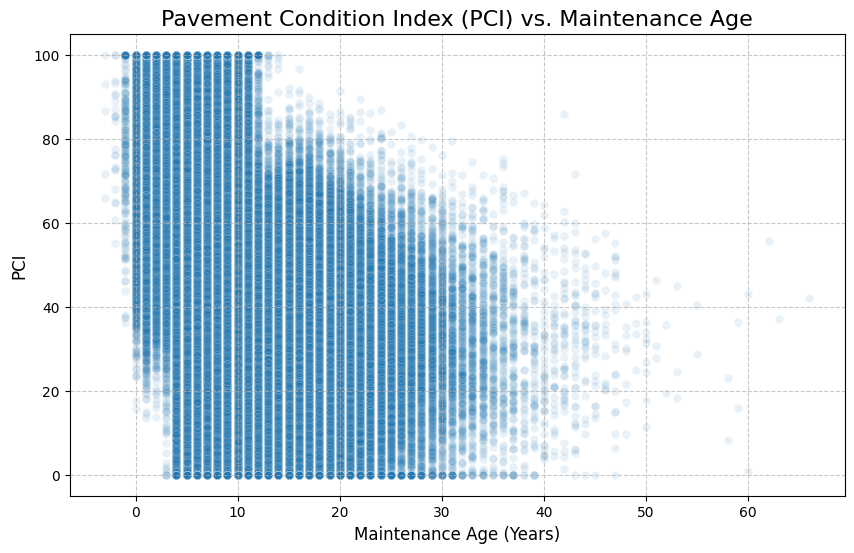

In [ ]:
print("\n### Observation 5: PCI vs. Maintenance Age")
# Assuming current year is 2025
df['Maintenance Age'] = 2025 - df['Last Maintenance']
print("New feature 'Maintenance Age' created.")
# Summary statistics for the new feature
print("\nSummary statistics for 'Maintenance Age':")
print(df['Maintenance Age'].describe())
# Plotting PCI vs. Maintenance Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Maintenance Age', y='PCI', alpha=0.1)
plt.title('Pavement Condition Index (PCI) vs. Maintenance Age', fontsize=16)
plt.xlabel('Maintenance Age (Years)', fontsize=12)
plt.ylabel('PCI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('pci_vs_maintenance_age.png')
print("PCI vs. Maintenance Age scatter plot saved as pci_vs_maintenance_age.png")
# Correlation between Maintenance Age and PCI
maintenance_age_pci_corr = df['Maintenance Age'].corr(df['PCI'])
print(f"Correlation between Maintenance Age and PCI: {maintenance_age_pci_corr:.4f}")
print("All five observations and their associated plots/tables have been generated.")

**Interpretation:** There is a moderate negative correlation (r=−0.4533) between Maintenance Age and PCI. This confirms that the longer a road segment goes without maintenance, the worse its condition becomes. This derived feature is a powerful predictor for a road's condition and can be used to forecast future maintenance needs.